In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv("dtdata.csv")

In [3]:
dataset

,ID,Age,Income,Gender,Marital Status,Buys
0,1,<21,High,Male,Single,No
1,2,<21,High,Male,Married,No
2,3,21-35,High,Male,Single,Yes
3,4,>35,Medium,Male,Single,Yes
4,5,>35,Low,Female,Single,Yes
5,6,>35,Low,Female,Married,No
6,7,21-35,Low,Female,Married,Yes
7,8,<21,Medium,Male,Single,No
8,9,<21,Low,Female,Married,Yes
9,10,>35,Medium,Female,Single,Yes


In [4]:
x = dataset.iloc[:,:-1]

In [5]:
x

,ID,Age,Income,Gender,Marital Status
0,1,<21,High,Male,Single
1,2,<21,High,Male,Married
2,3,21-35,High,Male,Single
3,4,>35,Medium,Male,Single
4,5,>35,Low,Female,Single
5,6,>35,Low,Female,Married
6,7,21-35,Low,Female,Married
7,8,<21,Medium,Male,Single
8,9,<21,Low,Female,Married
9,10,>35,Medium,Female,Single


In [6]:
y = dataset.iloc[:,5]
y

0      No
1      No
2     Yes
3     Yes
4     Yes
5      No
6     Yes
7      No
8     Yes
9     Yes
10    Yes
11    Yes
12    Yes
13     No
Name: Buys, dtype: object

In [7]:
type(y)

pandas.core.series.Series

In [8]:
import sklearn
from sklearn.preprocessing import LabelEncoder

In [9]:
!pip3 install sklearn

Defaulting to user installation because normal site-packages is not writeable


In [10]:
#labelencoder_x = LabelEncoder()
#labelencoder_x

In [11]:
x = x.apply(LabelEncoder().fit_transform)

In [12]:
x

,ID,Age,Income,Gender,Marital Status
0,0,1,0,1,1
1,1,1,0,1,0
2,2,0,0,1,1
3,3,2,2,1,1
4,4,2,1,0,1
5,5,2,1,0,0
6,6,0,1,0,0
7,7,1,2,1,1
8,8,1,1,0,0
9,9,2,2,0,1


In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
result = DecisionTreeClassifier()

In [15]:
result.fit(x.iloc[:,1:5],y)

DecisionTreeClassifier()

In [16]:
X_in = np.array([1,1,0,0])
X_in

array([1, 1, 0, 0])

In [17]:
y_pred =result.predict([X_in])

In [18]:
y_pred

array(['Yes'], dtype=object)

In [19]:
!pip3 install -U scikit-learn scipy matplotlib

Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: scikit-learn in /home/mithun/.local/lib/python3.8/site-packages (0.23.1)
Requirement already up-to-date: scipy in /home/mithun/.local/lib/python3.8/site-packages (1.5.0)
Requirement already up-to-date: matplotlib in /home/mithun/.local/lib/python3.8/site-packages (3.2.2)


In [47]:
#from sklearn import externals

In [48]:
#from sklearn.externals import six
#import io

In [49]:
#from sklearn.externals.six import  io.StringIO()

In [50]:
from IPython.display import Image

In [60]:
from sklearn.tree import export_graphviz

In [61]:
!pip3 install pydotplus

Defaulting to user installation because normal site-packages is not writeable


In [62]:
import pydotplus

In [63]:
dot_data = io.StringIO()

In [55]:
export_graphviz(result, out_file = dot_data, filled = True, rounded = True, special_characters = True)

In [56]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [57]:
!pip3 install graphviz

Defaulting to user installation because normal site-packages is not writeable


In [58]:
graph.write_png('tree.png')

True

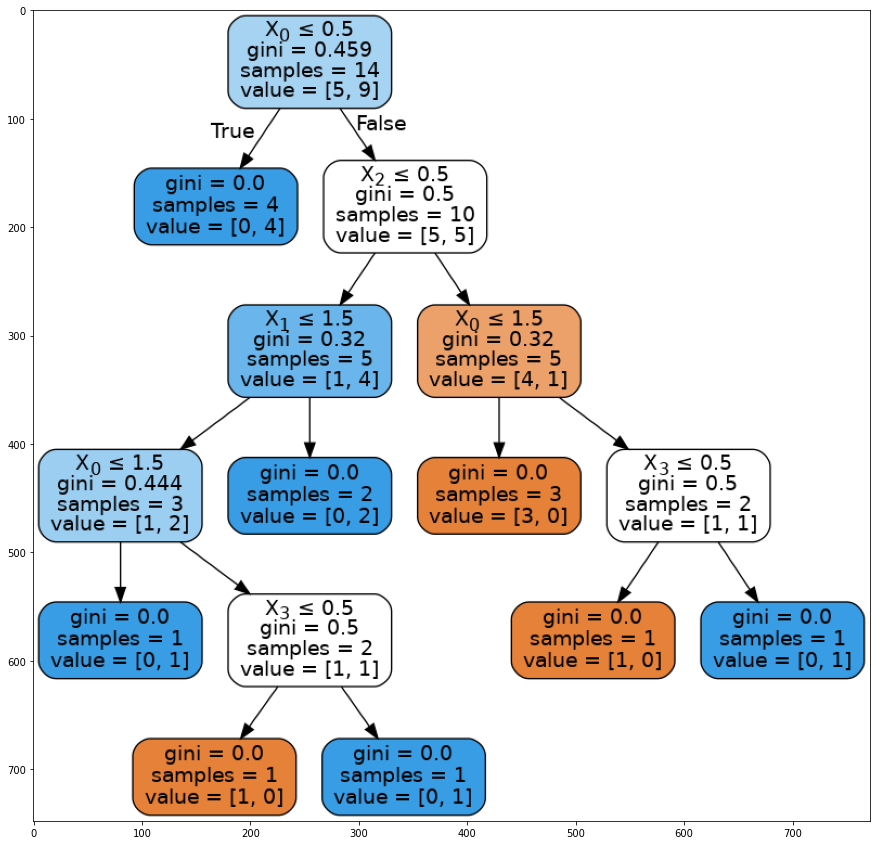

In [59]:
image = plt.imread('tree.png')
plt.figure(figsize=(15,15))
plt.imshow(image)